# Setup

In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

from platform import python_version
print(f'python version: {python_version()}')

Conda Environment: ROICaT
python version: 3.9.13


In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import natsort

import torch

import gc
import time
import functools
import multiprocessing as mp


In [3]:
tic = time.time()
toc = {}
toc['start'] = time.time() - tic

In [4]:
%load_ext autoreload
%autoreload 2
import roicat
# from roicat import helpers, data_importing, ROInet
# from roicat.tracking import alignment, blurring, clustering, scatteringWaveletTransformer, similarity_graph, visualization

In [5]:
from bnpm import file_helpers

In [6]:
%matplotlib inline

# Import paths

In [7]:
tmp_paths = roicat.helpers.find_paths(
    dir_outer='/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data',
    reMatch='stat.npy',
    depth=4,
)

dirs_allExp = natsort.natsorted(list(set([str(Path(d).resolve().parent.parent) for d in tmp_paths])))

paths to all stat files:
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210626/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210627/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210628/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210629/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210630/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210701/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210703/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210704/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210705/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN11/210706/stat.npy

path

100%|███████████████████████████████████████████| 10/10 [00:08<00:00,  1.11it/s]


Imported 10 sessions of spatial footprints into sparse arrays.
Completed: Set spatialFootprints for 10 sessions successfully.
Completed: Created sessionID_concat.
Completed: Created centroids.
Staring: Creating centered ROI images from spatial footprints...
Completed: Created ROI images.


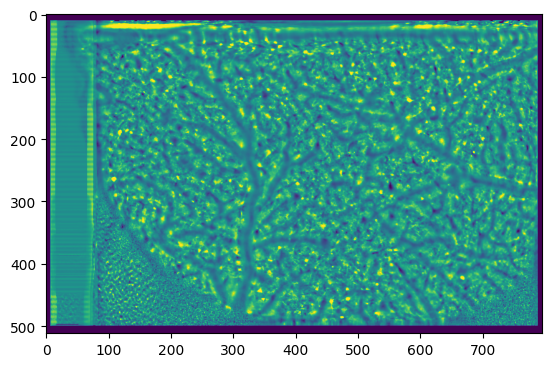

interactive(children=(IntSlider(value=0, description='i_frame', max=9), Output()), _dom_classes=('widget-inter…

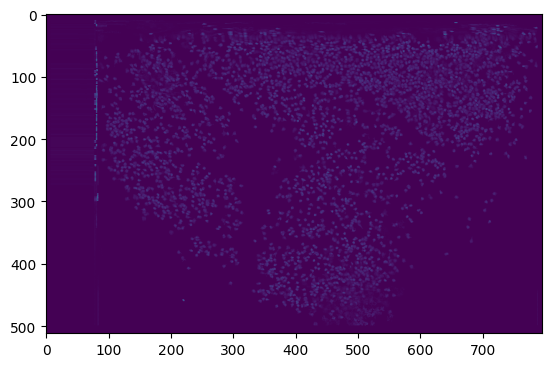

interactive(children=(IntSlider(value=0, description='i_frame', max=9), Output()), _dom_classes=('widget-inter…

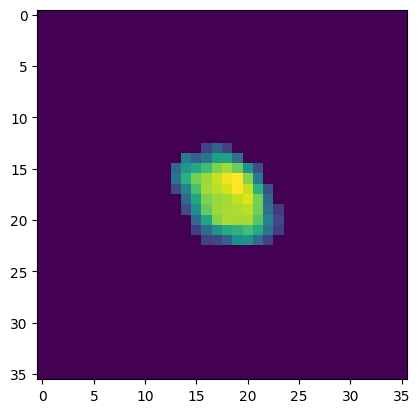

interactive(children=(IntSlider(value=0, description='i_frame', max=34163), Output()), _dom_classes=('widget-i…

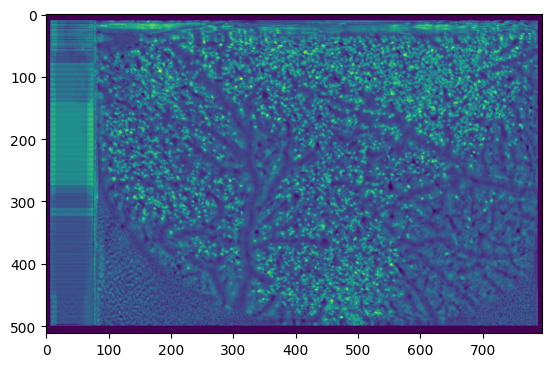

interactive(children=(IntSlider(value=0, description='i_frame', max=9), Output()), _dom_classes=('widget-inter…

Finding geometric registration warps with mode: homography, template_method: sequential, mask_borders: True


Finding geometric registration warps: 100%|█████| 10/10 [00:10<00:00,  1.06s/it]


Composing geometric warp matrices...
Applying geometric registration warps to images...
Finding nonrigid registration warps with mode: createOptFlow_DeepFlow, template_method: image


Finding nonrigid registration warps: 100%|███| 10/10 [00:04<00:00,  2.35image/s]


Composing nonrigid warp matrices...
Applying nonrigid registration warps to images...


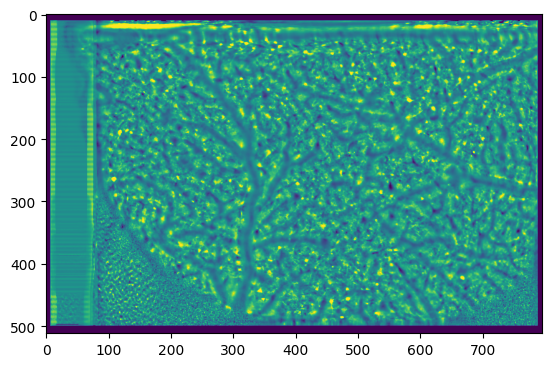

interactive(children=(IntSlider(value=0, description='i_frame', max=9), Output()), _dom_classes=('widget-inter…

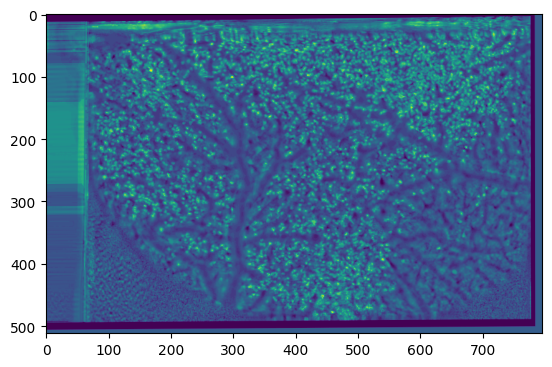

interactive(children=(IntSlider(value=0, description='i_frame', max=9), Output()), _dom_classes=('widget-inter…

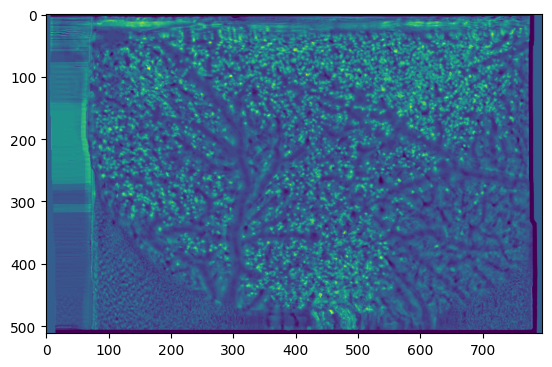

interactive(children=(IntSlider(value=0, description='i_frame', max=9), Output()), _dom_classes=('widget-inter…

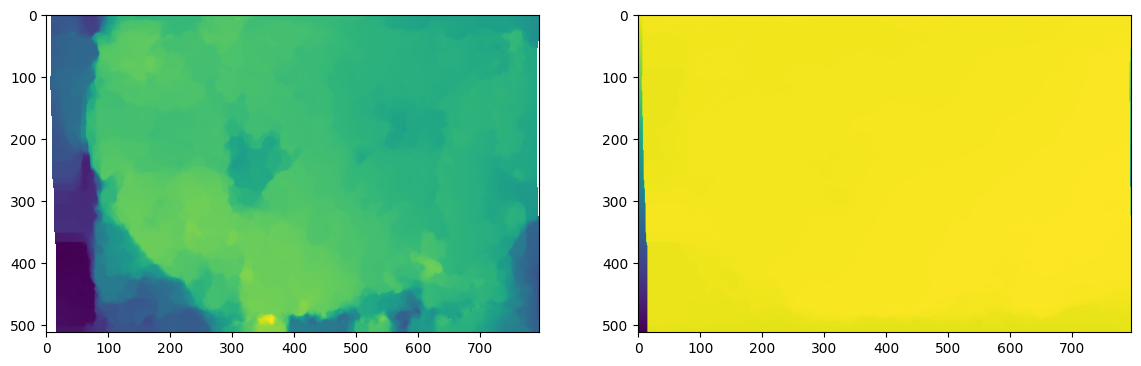

interactive(children=(IntSlider(value=0, description='i_frame', max=9), Output()), _dom_classes=('widget-inter…

Registering ROIs...



100%|█████████████████████████████████████| 3478/3478 [00:03<00:00, 1109.68it/s]
/media/rich/Home_Linux_partition/github_repos/ROICaT/roicat/tracking/alignment.py:434: RuntimeWarning: divide by zero encountered in divide
  rois_aligned = rois_aligned.multiply(1/rois_aligned.sum(1))

100%|█████████████████████████████████████| 3663/3663 [00:03<00:00, 1106.45it/s]

100%|█████████████████████████████████████| 3596/3596 [00:01<00:00, 1910.35it/s]

100%|█████████████████████████████████████| 3285/3285 [00:02<00:00, 1097.63it/s]

100%|█████████████████████████████████████| 3513/3513 [00:03<00:00, 1094.99it/s]

100%|█████████████████████████████████████| 3295/3295 [00:02<00:00, 1110.47it/s]

100%|██████████████████████████████████████| 3465/3465 [00:04<00:00, 760.82it/s]

100%|█████████████████████████████████████| 3063/3063 [00:01<00:00, 2028.11it/s]

100%|█████████████████████████████████████| 3395/3395 [00:03<00:00, 1072.27it/s]

100%|█████████████████████████████████████| 3411/3411 [00:0

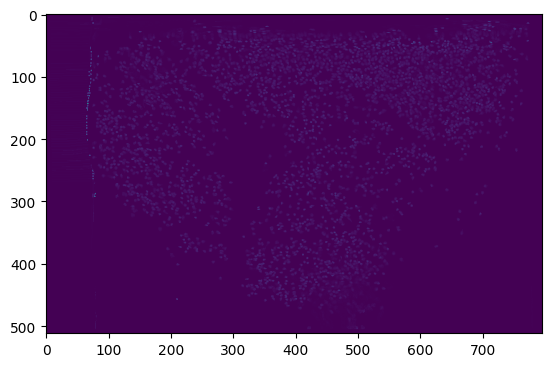

interactive(children=(IntSlider(value=0, description='i_frame', max=9), Output()), _dom_classes=('widget-inter…

Preparing the Toeplitz convolution matrix
Performing convolution for blurring


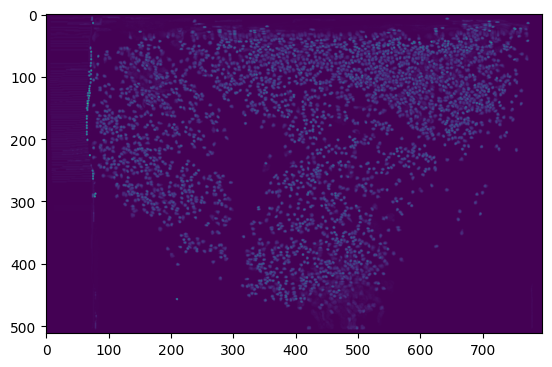

interactive(children=(IntSlider(value=0, description='i_frame', max=9), Output()), _dom_classes=('widget-inter…

File already exists locally: /home/rich/Desktop/tmp_data/ROInet.zip
Hash of local file matches provided hash_hex.
Extracting /home/rich/Desktop/tmp_data/ROInet.zip to /home/rich/Desktop/tmp_data.
Completed zip extraction.
['/home/rich/Desktop/tmp_data/ROInet_tracking_20220527', '/home/rich/Desktop/tmp_data/ROInet_tracking_20220527/params.json', '/home/rich/Desktop/tmp_data/ROInet_tracking_20220527/ReadMe.txt', '/home/rich/Desktop/tmp_data/ROInet_tracking_20220527/model.py', '/home/rich/Desktop/tmp_data/ROInet_tracking_20220527/ConvNext_tiny__1_0_best__simCLR.pth']
Imported model from /home/rich/Desktop/tmp_data/ROInet_tracking_20220527/model.py
Loaded params_model from /home/rich/Desktop/tmp_data/ROInet_tracking_20220527/params.json


/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from /home/rich/Desktop/tmp_data/ROInet_tracking_20220527/ConvNext_tiny__1_0_best__simCLR.pth
Loaded network onto device cuda:0
Starting: resizing ROIs
Completed: resizing ROIs
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader


/media/rich/Home_Linux_partition/github_repos/ROICaT/roicat/ROInet.py:329: UserWarning: 


  warnings.warn("\n\nWarning: Converting transforms to a jit-based script has been known to cause issues on Windows when numWorkers_dataloader > 0. If self.generate_latents() raises an Exception similar to 'Tried to serialize object __torch__.torch.nn.modules.container.Sequential which does not have a __getstate__ method defined!' consider setting numWorkers_dataloader=0 or jit_script_transforms=False.\n")


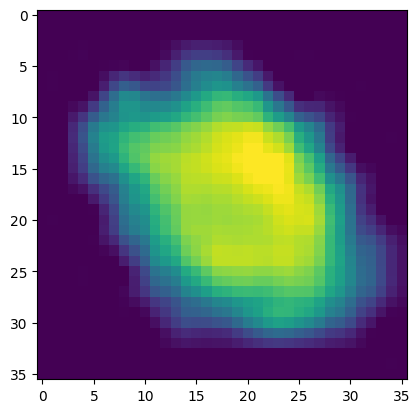

interactive(children=(IntSlider(value=0, description='i_frame', max=34163), Output()), _dom_classes=('widget-i…

starting: running data through network


  0%|                                                  | 0/4271 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int =

/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggere

completed: running data through network
SWT initialized
Starting: SWT transform on ROIs


  0%|                                                | 0/341.64 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|█████████████████████████████████████| 342/341.64 [00:00<00:00, 379.40it/s]


Completed: SWT transform on ROIs
Computing pairwise similarity between ROIs...


100%|█████████████████████████████████████████| 104/104 [00:08<00:00, 11.58it/s]


Joining blocks into full similarity matrices...
Joining s_sf...
Joining s_NN...
Joining s_SWT...
Joining s_sesh...
Finding k-range of center of mass distance neighbors for each ROI...
Normalizing Neural Network similarity scores...


100%|██████████████████████████████████| 34164/34164 [00:02<00:00, 14117.49it/s]


Normalizing SWT similarity scores...


100%|██████████████████████████████████| 34164/34164 [00:03<00:00, 10622.56it/s]


Finding mixing parameters using automated hyperparameter tuning...
Best value found: 0.1343999207019806 with parameters {'power_SF': 1.5612325248442187, 'power_NN': 0.22258674292287706, 'power_SWT': 0.6450109535243057, 'p_norm': -0.6972876214770829, 'sig_SF_kwargs': None, 'sig_NN_kwargs': {'mu': 0.272633662785912, 'b': 1.2941893300496443}, 'sig_SWT_kwargs': {'mu': 0.19813030450844193, 'b': 0.10090426362537652}}
Pruning similarity graphs with d_cutoff = 0.20203471183776855...


/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


  0%|                                                     | 0/6 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
100%|█████████████████████████████████████████████| 6/6 [01:41<00:00, 16.93s/it]


Number of clusters: 3946
Number of discarded ROIs: 19697


/media/rich/Home_Linux_partition/github_repos/ROICaT/roicat/visualization.py:124: RuntimeWarning: divide by zero encountered in divide
  rois = rois.multiply(1.2/rois.max(1).A).power(1)


path_save: /media/rich/bigSSD/analysis_data/ROICaT/ROI_tracking/Nghia/bigRun_20230502/plane_1/NN11/ROICaT.tracking.results.stringency_0.2.pkl
Pruning similarity graphs with d_cutoff = 0.2442803680896759...
Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


100%|█████████████████████████████████████████████| 6/6 [02:42<00:00, 27.03s/it]


Number of clusters: 4670
Number of discarded ROIs: 10533
path_save: /media/rich/bigSSD/analysis_data/ROICaT/ROI_tracking/Nghia/bigRun_20230502/plane_1/NN11/ROICaT.tracking.results.stringency_0.3.pkl
Pruning similarity graphs with d_cutoff = 0.28652602434158325...
Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


100%|█████████████████████████████████████████████| 6/6 [03:06<00:00, 31.11s/it]


Number of clusters: 4942
Number of discarded ROIs: 7056
path_save: /media/rich/bigSSD/analysis_data/ROICaT/ROI_tracking/Nghia/bigRun_20230502/plane_1/NN11/ROICaT.tracking.results.stringency_0.4.pkl
Pruning similarity graphs with d_cutoff = 0.37101733684539795...
Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


100%|█████████████████████████████████████████████| 6/6 [03:26<00:00, 34.46s/it]


Number of clusters: 5121
Number of discarded ROIs: 4480
path_save: /media/rich/bigSSD/analysis_data/ROICaT/ROI_tracking/Nghia/bigRun_20230502/plane_1/NN11/ROICaT.tracking.results.stringency_0.6.pkl
Pruning similarity graphs with d_cutoff = 0.45550864934921265...
Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


 33%|███████████████                              | 2/6 [01:26<02:52, 43.12s/it]

In [ ]:
for dir_exp in dirs_allExp:
    # dir_allOuterFolders = Path(r"/media/rich/bigSSD/other lab data/Harnett_lab/ROI_Tracking/Vincent_Valerio/4th_email/AllStatFiles/rbp16").resolve()
    # dir_allOuterFolders = Path(r"/media/rich/bigSSD/res2p/scanimage data/round 5 experiments/mouse 2_6/just_stat_files").resolve()
    # dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/Sofia_ROIs/Data for Rich/SS33/").resolve())
    # dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_1511L/statFiles/").resolve())
    # dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/").resolve())
    dir_allOuterFolders = str(Path(dir_exp).resolve())
    # dir_allOuterFolders = str(Path(r"/home/rich/Downloads/NN11/").resolve())
    # dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/downloads_tmp/NN9").resolve())

    # folders_allSessions = natsort.natsorted(helpers.get_dir_contents(dir_allOuterFolders)[0])[:]

    # dir_allS2pFolders = [dir_allOuterFolders / folder for folder in folders_allSessions]

    pathSuffixToStat = 'stat.npy'
    pathSuffixToOps = 'ops.npy'
    # pathSuffixToStat = 'Slice02/stat.npy'
    # pathSuffixToOps = 'Slice02/ops.npy'

    # paths_allStat = np.array([path / pathSuffixToStat for path in dir_allS2pFolders])[:]
    paths_allStat = test = roicat.helpers.find_paths(
        dir_outer=dir_allOuterFolders,
        reMatch=pathSuffixToStat,
        depth=4,
    )[:]
    # paths_allOps  = np.array([path / pathSuffixToOps for path in dir_allS2pFolders])[:]
    paths_allOps = test = roicat.helpers.find_paths(
        dir_outer=dir_allOuterFolders,
        reMatch=pathSuffixToOps,
        depth=4,
    )[:]
    # paths_allStat = np.array([path / pathSuffixToStat for path in dir_allS2pFolders])
    # paths_allOps  = np.array([path / pathSuffixToOps for path in dir_allS2pFolders])

    # print(f'folder names of all sessions: \n{display(folders_allSessions)}')
    print(f'paths to all stat files:');
    [print(path) for path in paths_allStat];
    print('');
    print(f'paths to all ops files:');
    [print(path) for path in paths_allOps];


    paths_allStat

    toc['import_paths'] = time.time() - tic

    # Import data

    toc['import_data'] = time.time() - tic

    data = roicat.data_importing.Data_suite2p(
        paths_statFiles=paths_allStat[:],
        paths_opsFiles=paths_allOps[:],
        um_per_pixel=4.0,
        new_or_old_suite2p='new',

        out_height_width=[36,36],

        type_meanImg='meanImgE',
    #     FOV_images=FOVs_mixed,

        verbose=True,
    )

    # data = roicat.data_importing.Data_suite2p(
    #     paths_statFiles=paths_allStat[:],
    # #     paths_opsFiles=paths_allOps[:],
    #     um_per_pixel=4.0,
    #     new_or_old_suite2p='new',

    #     out_height_width=[36,36],

    # #     type_meanImg='meanImgE',
    #     FOV_images=FOVs_mixed,

    #     verbose=True,
    # )

    assert data.check_completeness(verbose=False)['tracking'], f"Data object is missing attributes necessary for tracking."

#     %matplotlib notebook

    roicat.visualization.display_toggle_image_stack(data.FOV_images, clim=[0,1])

    roicat.visualization.display_toggle_image_stack([sf.max(0).reshape(data.FOV_height, data.FOV_width).toarray() for sf in data.spatialFootprints], clim=[0,0.1])

    roicat.visualization.display_toggle_image_stack(np.concatenate(data.ROI_images, axis=0))



    # Alignment

    use_CLAHE = True

    position_session_template = 0.5
    roi_FOV_image_mixing_factor = 0.5

    idx_st = int(position_session_template * data.n_sessions) if type(position_session_template) is float else position_session_template

    FOV_images = [f + np.array(roi_FOV_image_mixing_factor*(sf.multiply(1/sf.max(1).A)).sum(0).reshape(data.FOV_height, data.FOV_width)) for f, sf in zip(data.FOV_images, data.spatialFootprints)]
    FOV_images = [roicat.tracking.alignment.clahe(im, grid_size=1, clipLimit=1, normalize=True) for im in FOV_images] if use_CLAHE else FOV_images

    # import copy
    # FOV_images = copy.deepcopy(data.FOV_images)

#     %matplotlib notebook

    roicat.visualization.display_toggle_image_stack(FOV_images)

    aligner = roicat.tracking.alignment.Aligner(verbose=True)
    aligner.fit_geometric(
    #     template=FOV_images[4],
        template=4,
        ims_moving=FOV_images,
        template_method='sequential',
        mode_transform='homography',
        mask_borders=(50,50,100,50),
        n_iter=50,
        termination_eps=1e-09,
        gaussFiltSize=31,
        auto_fix_gaussFilt_step=10,
    )

    aligner.transform_images_geometric(FOV_images);

    aligner.fit_nonrigid(
        template=FOV_images[4],
    #     template=4,
        ims_moving=aligner.ims_registered_geo,
        remappingIdx_init=aligner.remappingIdx_geo,
        template_method='image',
        mode_transform='createOptFlow_DeepFlow',
        kwargs_mode_transform=None,
    )

    aligner.transform_images_nonrigid(FOV_images);

#     %matplotlib notebook

    roicat.visualization.display_toggle_image_stack(data.FOV_images)
    roicat.visualization.display_toggle_image_stack(aligner.ims_registered_geo)
    roicat.visualization.display_toggle_image_stack(aligner.ims_registered_nonrigid)
    roicat.visualization.display_toggle_2channel_image_stack(aligner.get_flowFields())

    aligner.transform_ROIs(
        ROIs=data.spatialFootprints, 
        remappingIdx=aligner.remappingIdx_nonrigid,
        normalize=True,
    );

    roicat.visualization.display_toggle_image_stack(aligner.get_ROIsAligned_maxIntensityProjection(), clim=[0,0.1])

    toc['alignment'] = time.time() - tic

    ## Blur ROIs (optional)

    blurrer = roicat.tracking.blurring.ROI_Blurrer(
        frame_shape=(data.FOV_height, data.FOV_width),
        kernel_halfWidth=2,
        plot_kernel=False,
    )

    blurrer.blur_ROIs(
        spatialFootprints=aligner.ROIs_aligned[:],
    )

#     %matplotlib notebook
    roicat.visualization.display_toggle_image_stack(blurrer.get_ROIsBlurred_maxIntensityProjection(), clim=[0,0.1])

    toc['blur'] = time.time() - tic

    ## Neural network embedding distances

    roinet = roicat.ROInet.ROInet_embedder(
        device='cuda:0',
        dir_networkFiles=r'/home/rich/Desktop/tmp_data/',
        download_method='check_local_first',
        download_url='https://osf.io/x3fd2/download',
        download_hash='7a5fb8ad94b110037785a46b9463ea94',
        forward_pass_version='latent',
        verbose=True,
    )

    roinet.generate_dataloader(
        ROI_images=data.ROI_images,
        um_per_pixel=data.um_per_pixel,
        pref_plot=False,

        jit_script_transforms=True,

        batchSize_dataloader=8,
        pinMemory_dataloader=True,
        numWorkers_dataloader=mp.cpu_count(),
        persistentWorkers_dataloader=True,
        prefetchFactor_dataloader=2,    

    #     batchSize_dataloader=1,
    #     pinMemory_dataloader=False,
    #     numWorkers_dataloader=0,
    #     persistentWorkers_dataloader=False,
    #     prefetchFactor_dataloader=2,    
    );

#     %matplotlib notebook
    roicat.visualization.display_toggle_image_stack(roinet.ROI_images_rs, clim=[0, 0.05])

    roinet.generate_latents();


    gc.collect()
    torch.cuda.empty_cache()
    gc.collect()
    torch.cuda.empty_cache()

    toc['NN'] = time.time() - tic

    ## Scattering wavelet embedding distances

    swt = roicat.tracking.scatteringWaveletTransformer.SWT(
        kwargs_Scattering2D={'J': 2, 'L': 2}, 
        image_shape=data.ROI_images[0].shape[1:3], 
        device='cuda:0'
    )

    swt.transform(
        ROI_images=np.concatenate(data.ROI_images, axis=0),
        batch_size=100,
    );

    gc.collect()
    torch.cuda.empty_cache()
    gc.collect()
    torch.cuda.empty_cache()


    toc['SWT'] = time.time() - tic

    ## Compute similarities

    sim = roicat.tracking.similarity_graph.ROI_graph(
        n_workers=-1,
        frame_height=data.FOV_height,
        frame_width=data.FOV_width,
    #     block_height=data.FOV_height,
    #     block_width=data.FOV_width,
        block_height=64,
        block_width=64,
        algorithm_nearestNeigbors_spatialFootprints='brute',
        verbose=True,
    )

    sim.visualize_blocks()

    s_sf, s_NN, s_SWT, s_sesh = sim.compute_similarity_blockwise(
        spatialFootprints=blurrer.ROIs_blurred,
    #     spatialFootprints=aligner.ROIs_aligned,
        features_NN=roinet.latents,
        features_SWT=swt.latents,
        ROI_session_bool=data.sessionID_concat,
        spatialFootprint_maskPower=1.0,
    );

    sim.make_normalized_similarities(
        centers_of_mass=data.centroids,
        features_NN=roinet.latents,
        features_SWT=swt.latents,
    #     features_SWT=None,
        k_max=4000,
        k_min=100,
        algo_NN='kd_tree',
        device='cuda:0'
    )

    toc['sim'] = time.time() - tic

    # Clustering

    clusterer = roicat.tracking.clustering.Clusterer(
        s_sf=sim.s_sf,
        s_NN_z=sim.s_NN_z,
        s_SWT_z=sim.s_SWT_z,
        s_sesh=sim.s_sesh,
    )

    kwargs_makeConjunctiveDistanceMatrix_best = clusterer.find_optimal_parameters_for_pruning(
        n_bins=50,
        find_parameters_automatically=True,
        kwargs_findParameters={
            'n_patience': 100,
            'tol_frac': 0.05,
            'max_trials': 350,
            'max_duration': 60*10,
            'verbose': False,
        },
        bounds_findParameters={
            'power_SF': (0.3, 2),
            'power_NN': (0.2, 2),
            'power_SWT': (0.1, 1),
            'p_norm': (-5, 5),
            'sig_NN_kwargs_mu': (0, 0.5),
            'sig_NN_kwargs_b': (0.05, 2),
            'sig_SWT_kwargs_mu': (0, 0.5),
            'sig_SWT_kwargs_b': (0.05, 2),
        },
        n_jobs_findParameters=-1,    
    #     fallback_d_cutoff=0.5,
    #     plot_pref=True,
    )

    toc['separate_diffSame'] = time.time() - tic

    clusterer.plot_distSame()

    clusterer.plot_similarity_relationships(
        plots_to_show=[1,2,3], 
        max_samples=100000, 
        kwargs_scatter={'s':1, 'alpha':0.2},
        kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
    #     kwargs_makeConjunctiveDistanceMatrix={
    #         'power_SF': 1.0,
    #         'power_NN': 1.0,
    #         'power_SWT': 0.1,
    #         'p_norm': -4.0,
    #         'sig_SF_kwargs': {'mu':0.5, 'b':4},
    # #         'sig_SF_kwargs': None,
    #         'sig_NN_kwargs': {'mu':0.5, 'b':1.5},
    #         'sig_SWT_kwargs': {'mu':0.5, 'b':0.5},
    #     },
    );

    for stringency in [0.2, 0.3, 0.4, 0.6, 0.8, 1.0]:
        clusterer.make_pruned_similarity_graphs(
            d_cutoff=None,
            kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
            stringency=stringency,
        )

        if data.n_sessions >= 8:
            labels = clusterer.fit(
                session_bool=data.sessionID_concat,
                min_cluster_size=2,
                cluster_selection_method='leaf',
                d_clusterMerge=None,
                alpha=0.999,
                n_iter_violationCorrection=6,
                d_conj=None,
                kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
            #     kwargs_makeConjunctiveDistanceMatrix={
            #         'power_SF': 1.0,
            #         'power_NN': 1.0,
            #         'power_SWT': 0.1,
            #         'p_norm': -2,
            #         'sig_SF_kwargs': None,
            #         'sig_NN_kwargs':  {'mu':0, 'b':0.2},
            #         'sig_SWT_kwargs': {'mu':0, 'b':0.2},
            #     },
                split_intraSession_clusters=True,
                discard_failed_pruning=True,
                d_step=0.01,
            )

        else:
            labels = clusterer.fit_sequentialHungarian(
                session_bool=data.sessionID_concat,
                thresh_cost=0.6,
                d_conj=None,
                kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
            #     kwargs_makeConjunctiveDistanceMatrix={
            #     'power_SF': 1.0,
            #     'power_NN': 1.0,
            #     'power_SWT': 0.1,
            #     'p_norm': -2,
            #     'sig_SF_kwargs': None,
            #     'sig_NN_kwargs':  {'mu':0, 'b':0.2},
            #     'sig_SWT_kwargs': {'mu':0, 'b':0.2},
            #     },
            )

        labels_bySession = [labels[idx] for idx in data.sessionID_concat.T]

        ## results_clustering
        print(f'Number of clusters: {len(np.unique(labels))}')
        print(f'Number of discarded ROIs: {(labels==-1).sum()}')

        toc['clustering'] = time.time() - tic

        # Visualize results

        FOV_clusters = roicat.visualization.compute_colored_FOV(
            spatialFootprints=[r.power(0.7) for r in aligner.ROIs_aligned],
            FOV_height=data.FOV_height,
            FOV_width=data.FOV_width,
            boolSessionID=data.sessionID_concat,
            labels=labels,
            confidence=None,
        )

    #     %matplotlib notebook
    #     roicat.visualization.display_toggle_image_stack(
    #         FOV_clusters, 
    #     #     interpolation='none', 
    #     #     filternorm=False, 
    #     #     resample=False
    #     )

        # visualization.display_toggle_image_stack(aligner.get_ROIsAligned_maxIntensityProjection())

        import scipy.sparse

        ucids = labels.copy()
        # ucids = ucids[ucids==975]
        ucids_unique = np.unique(ucids[ucids>-1])

        # ROI_ims = np.concatenate(data.ROI_images, axis=0)
        ROI_ims_sparse = scipy.sparse.vstack(aligner.ROIs_aligned)
        ROI_ims_sparse = ROI_ims_sparse.multiply( ROI_ims_sparse.max(1).power(-1) ).tocsr()


        ucid_sfCat = []
        for ucid in ucids_unique:
            idx = np.where(ucids == ucid)[0]
            ucid_sfCat.append( np.concatenate(list(roicat.visualization.crop_cluster_ims(ROI_ims_sparse[idx].toarray().reshape(len(idx), data.FOV_height, data.FOV_width))), axis=1) )
        #     ucid_sfCat.append( np.concatenate(list(ROI_ims_sparse[idx].toarray().reshape(len(idx), data.FOV_height, data.FOV_width)), axis=1) )
        # data.ROI_images[i_sesh][idx] for 


    #     %matplotlib inline

    #     for sf in ucid_sfCat[:100]:
    #         plt.figure(figsize=(40,1))
    #         plt.imshow(sf, cmap='gray')
    #         plt.axis('off')

    #     %matplotlib notebook

        _, counts = np.unique(labels, return_counts=True)

    #     plt.figure()
    #     plt.hist(counts, 30, range=(0, data.n_sessions+1));


        toc['visualize'] = time.time() - tic

        # Save results

        dir_save = Path('/media/rich/bigSSD/analysis_data/ROICaT/ROI_tracking/Nghia/bigRun_20230502').resolve()
        # name_save = Path(dir_allOuterFolders).resolve().name
    #     name_save = 'mouse_0322R'
        name_save = '/'.join(Path(dir_allOuterFolders).resolve().parts[-2:]) + '/'
        # path_save = dir_save / (name_save + '.ROICaT.tracking.results' + '.pkl')
        path_save = str(dir_save / (name_save + 'ROICaT.tracking.results.' + f'stringency_{stringency}' + '.pkl'))
        print(f'path_save: {path_save}')

        ROIs = {
            "ROIs_aligned": aligner.ROIs_aligned,
            "ROIs_raw": data.spatialFootprints,
            "frame_height": data.FOV_height,
            "frame_width": data.FOV_width,
            "idx_roi_session": np.where(data.sessionID_concat)[1]
        }

        results = {
            "UCIDs": labels,
            "UCIDs_bySession": labels_bySession,
            "ROIs": ROIs,
            "input_data": {
                "paths_stat": data.paths_stat,
                "paths_ops": data.paths_ops,
            }
        }

        roicat.helpers.pickle_save(
            obj=results,
            path_save=path_save,
            mkdir=True,
        )

        toc['saving'] = time.time() - tic

        toc

    import copy
    run_data = copy.deepcopy({
        'data': data.serializable_dict,
        'aligner': aligner.serializable_dict,
        'blurrer': blurrer.serializable_dict,
        'roinet': roinet.serializable_dict,
        'swt': swt.serializable_dict,
        'sim': sim.serializable_dict,
        'clusterer': clusterer.serializable_dict,
    })
    roicat.helpers.pickle_save(
        obj=run_data,
        path_save=str(dir_save / (name_save + 'ROICaT.tracking.rundata' + '.pkl')),
        mkdir=True,
    )